In [1]:
from utils.utils import get_features_label, split_csv

from preprocessing.cleaning import get_cleaned_data
from preprocessing.encoding import encode_data

from exploration.data_correlations import plot_correlations
from exploration.data_statistics import plot_labels_pie_chart, plot_blood_draw_statistics
from exploration.midterm_exploration import plot_feature_against_diagnosis
from exploration.feature_selection_plots import plot_mrmr_features, plot_rf_features, plot_mrmr_features_scaled, plot_rf_features_scaled, plot_mrmr_and_rf
from modeling.mrmr_feature_selection import plot_accuracy_with_features, perform_mrmr
from modeling.logistic import run_elastic_net, evaluate_results
from modeling.RandomForest import run_random_forest

import pandas as pd
import matplotlib as plt

In [2]:
df = encode_data(get_cleaned_data())
combined, blood_only, clinical_only = split_csv(df)

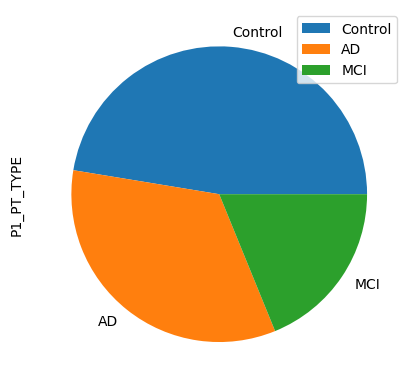

In [3]:
plot_labels_pie_chart(df, png="Pie Chart of Diagnoses")

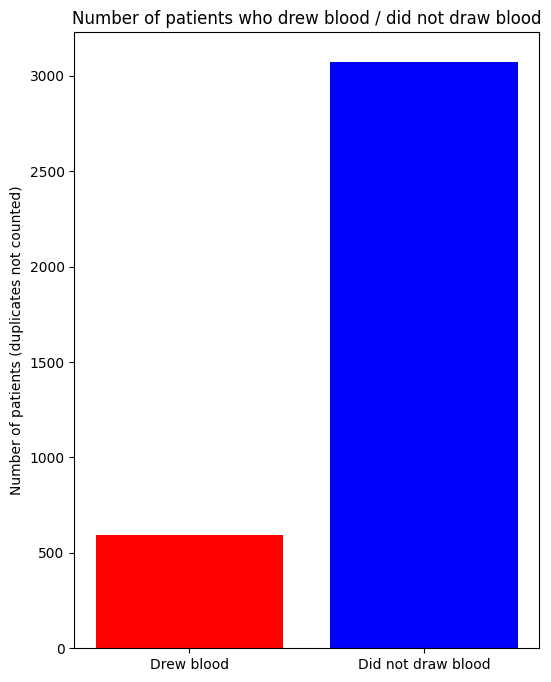

In [4]:
plot_blood_draw_statistics(df, png="Blood Draw Proportions")

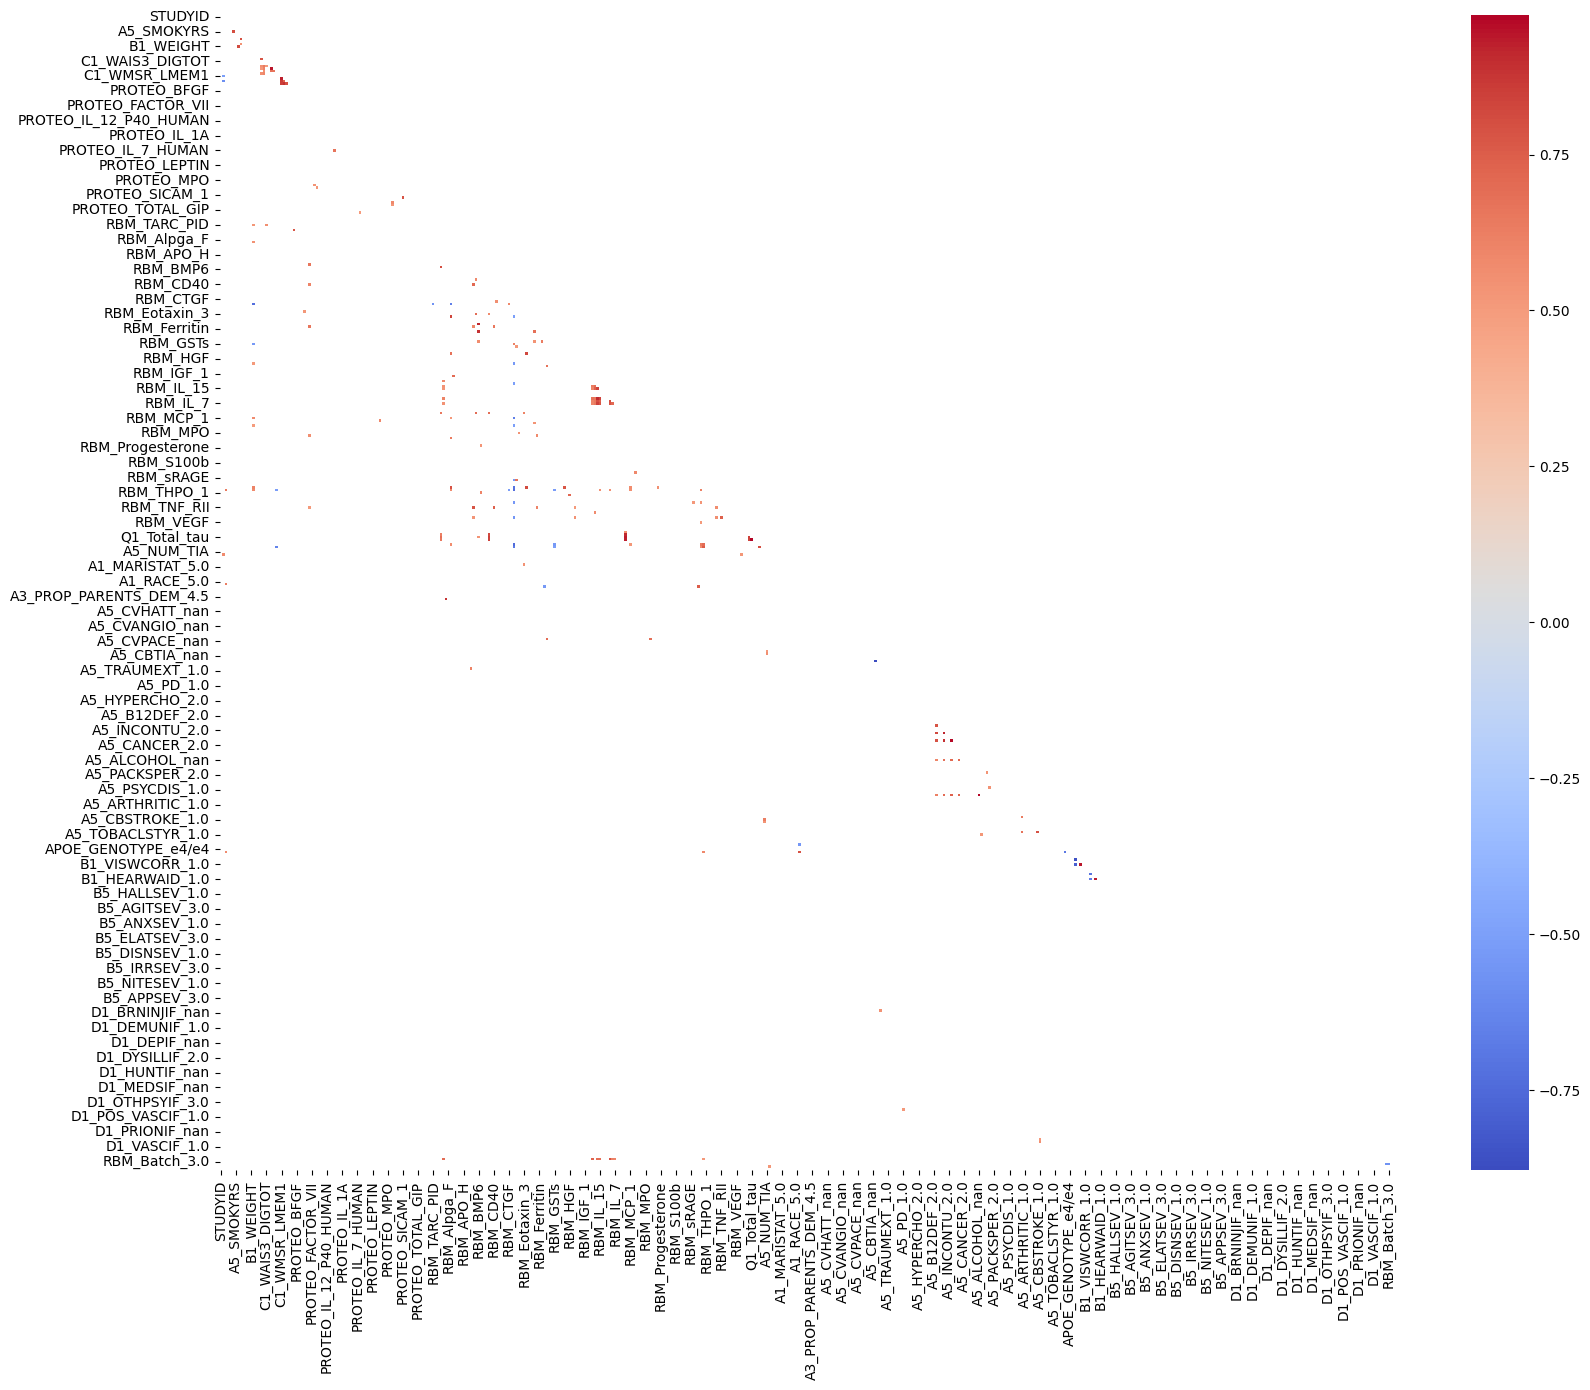

In [5]:
plot_correlations(df)

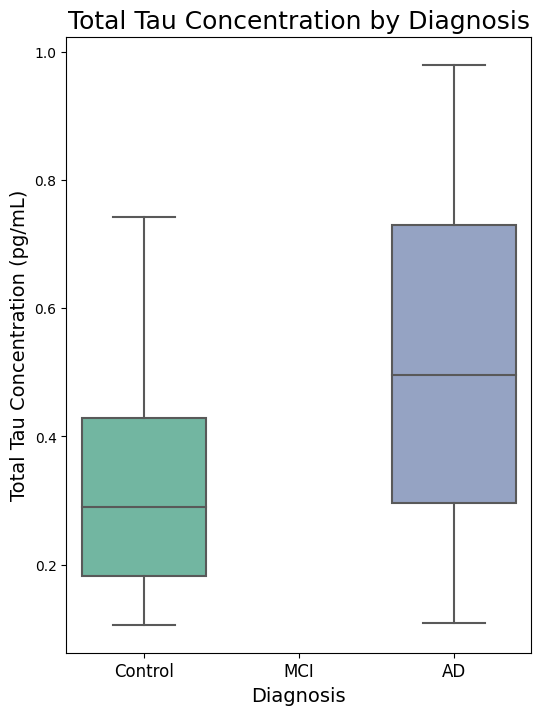

In [6]:
plot_feature_against_diagnosis(
    blood_only,
    "Q1_Total_tau",
    title="Total Tau Concentration by Diagnosis",
    ylabel="Total Tau Concentration (pg/mL)",
    png="Total Tau Concentration by Diagnosis"
)

In [12]:
plot_feature_against_diagnosis(
    clinical_only,
    "C1_MMSE",
    title="MMSE Score by Diagnosis",
    ylabel="MMSE Score",
    png="MMSE Score by Diagnosis"
)

ValueError: Could not interpret input 'C1_MMSE'

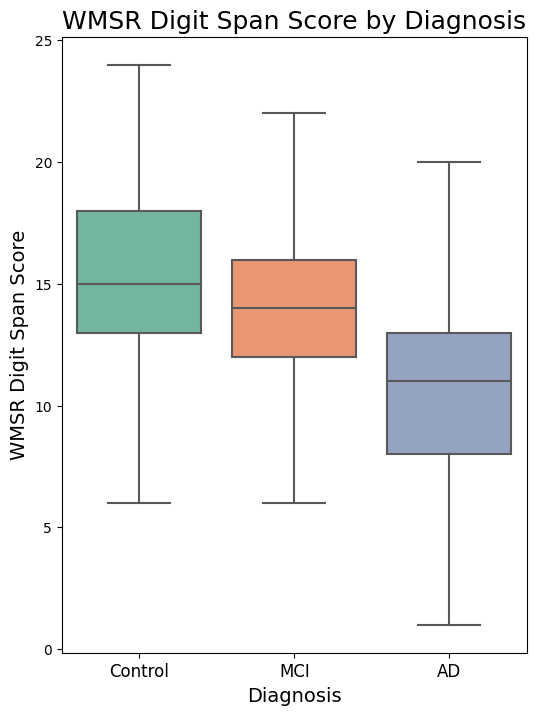

In [13]:
plot_feature_against_diagnosis(
    clinical_only,
    "C1_WMSR_DIGTOT",
    title="WMSR Digit Span Score by Diagnosis",
    ylabel="WMSR Digit Span Score",
    png="WMSR Digit Span Score by Diagnosis"
)

100%|██████████| 373/373 [01:53<00:00,  3.29it/s]


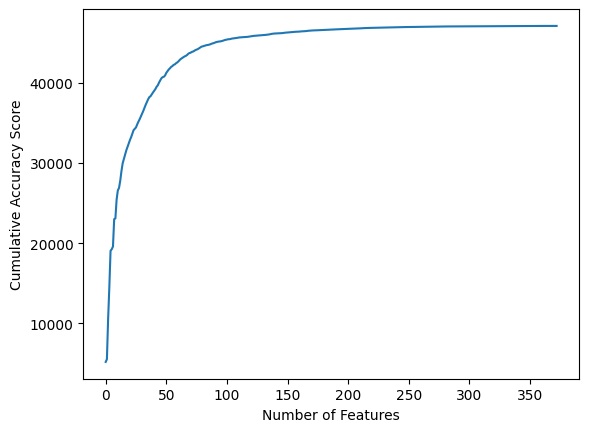

In [3]:
import pandas as pd

y, X = get_features_label(df)
y = pd.Series(y)
plot_accuracy_with_features(X, y)

In [3]:
import pandas as pd
blood_only_selected_features, blood_scores, _ = perform_mrmr(blood_only.drop("P1_PT_TYPE", axis=1), pd.Series(blood_only["P1_PT_TYPE"]), 100, True)
clinical_only_selected_features, clinical_scores, _ = perform_mrmr(clinical_only.drop("P1_PT_TYPE", axis=1), pd.Series(clinical_only["P1_PT_TYPE"]), 100, True)
combined_selected_features, combined_scores, _ = perform_mrmr(combined.drop("P1_PT_TYPE", axis=1), pd.Series(combined["P1_PT_TYPE"]), 100, True)

100%|██████████| 100/100 [00:08<00:00, 12.37it/s]


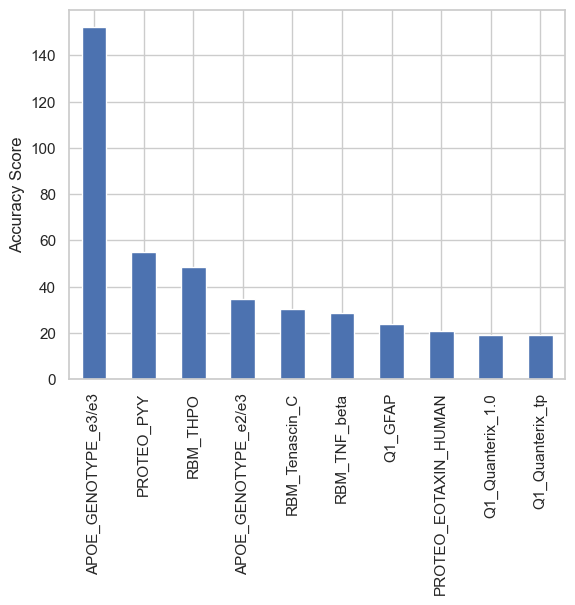

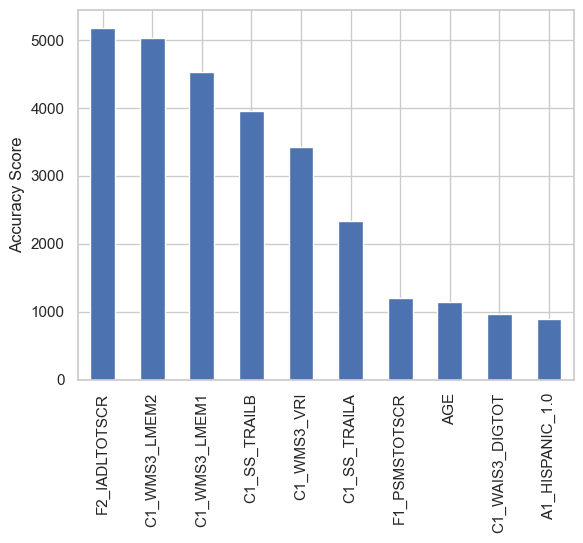

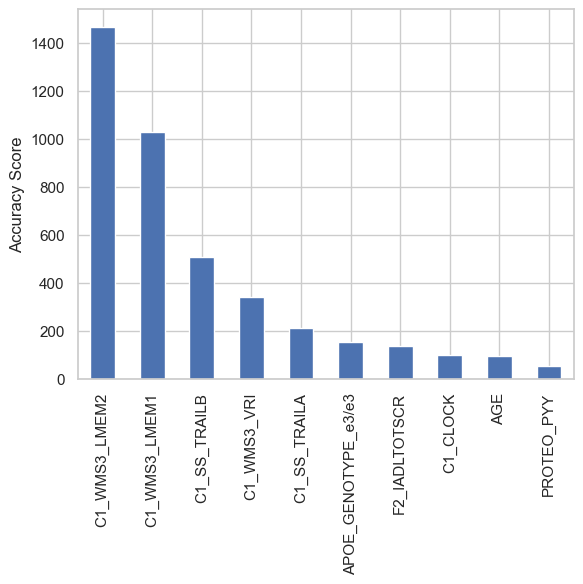

In [9]:
plot_mrmr_features(blood_scores)
plot_mrmr_features(clinical_scores)
plot_mrmr_features(combined_scores)

In [ ]:
run_elastic_net(blood_only, num_iters=20, pickle="Blood Only Elastic Net")

In [4]:
evaluate_results("Blood Only Elastic Net")

Iteration 0
Best C: 0.1
Best l1 ratio: 0.6
Micro-F1 score: 0.8403361344537815
Feature importances: Index(['APOE_GENOTYPE_nan', 'Q1_GFAP', 'APOE_GENOTYPE_e2/e3', 'RBM_PAI_1',
       'PROTEO_FACTOR_VII', 'RBM_IGF_BP_2', 'RBM_CTGF', 'RBM_HCC_4',
       'RBM_VCAM_1', 'RBM_TNF_beta',
       ...
       'PROTEO_PYY', 'RBM_EN_RAGE', 'Q1_YKL_40', 'PROTEO_SVCAM_1', 'RBM_IL_18',
       'PROTEO_TIE_2', 'PROTEO_FLT_1', 'RBM_Prolactin', 'PROTEO_MPO',
       'RBM_THPO'],
      dtype='object', length=196)
Confusion matrix:
[[45 14]
 [ 5 55]]

Iteration 1
Best C: 0.1
Best l1 ratio: 0.2
Micro-F1 score: 0.8487394957983193
Feature importances: Index(['APOE_GENOTYPE_nan', 'RBM_THPO', 'APOE_GENOTYPE_e3/e3', 'RBM_IL_15',
       'RBM_TECK', 'PROTEO_PYY', 'PROTEO_LBP', 'RBM_B2M', 'RBM_RANTES',
       'RBM_PARC',
       ...
       'RBM_GSTs', 'RBM_Active_GLP_1', 'RBM_G_CSF', 'RBM_Complement_3',
       'RBM_TNF_beta', 'APOE_GENOTYPE_e4/e4', 'RBM_Leptin', 'RBM_IGF_1',
       'RBM_CTGF', 'PROTEO_MPO'],
      dtype

In [ ]:
run_elastic_net(clinical_only, num_iters=20, pickle="Clinical Only Elastic Net")

In [5]:
evaluate_results("Clinical Only Elastic Net")

Iteration 0
Best C: 100.0
Best l1 ratio: 0
Micro-F1 score: 0.8285024154589372
Feature importances: Index(['F2_IADLTOTSCR', 'C1_WMSR_VRI', 'C1_WMSR_LMEM2', 'C1_WMS3_LMEM2',
       'C1_WMSR_VRII', 'F1_PSMSTOTSCR', 'C1_WMSR_LMEM1', 'C1_SS_TRAILB',
       'C1_WMS3_VRI', 'D1_DEPIF_2.0',
       ...
       'B5_NITESEV_1.0', 'A5_CVANGIO_1.0', 'B1_HEIGHT', 'A5_INCONTU_1.0',
       'A5_ARTHRITIC_1.0', 'A5_PACKSPER_8.0', 'C1_WAIS3_DIGTOT',
       'A3_PROP_PARENTS_DEM_1.0', 'A5_HYPERCHO_1.0', 'B1_WEIGHT'],
      dtype='object', length=265)
Confusion matrix:
[[ 882   30   55]
 [  14 1249   99]
 [  87  212  270]]

Iteration 1
Best C: 0.1
Best l1 ratio: 0.4
Micro-F1 score: 0.8291925465838509
Feature importances: Index(['F2_IADLTOTSCR', 'C1_WMSR_VRI', 'C1_WMSR_LMEM2', 'C1_WMS3_LMEM2',
       'C1_WMSR_VRII', 'C1_WMS3_VRI', 'C1_SS_TRAILB', 'B5_NPIQINF',
       'A1_HISPANIC_1.0', 'F1_PSMSTOTSCR',
       ...
       'B1_VISION_1.0', 'A5_HYPERTEN_1.0', 'B5_AGITSEV_1.0', 'A5_THYROID_1.0',
       'A1_SEX_1.0'

In [ ]:
run_elastic_net(combined, num_iters=20, pickle="Combined Elastic Net")

In [6]:
evaluate_results("Combined Elastic Net")

Iteration 0
Best C: 0.1
Best l1 ratio: 0.6
Micro-F1 score: 0.9411764705882353
Feature importances: Index(['C1_SS_TRAILB', 'APOE_GENOTYPE_nan', 'C1_WMS3_LMEM2', 'C1_WMSR_LMEM2',
       'F2_IADLTOTSCR', 'APOE_GENOTYPE_e3/e3', 'RBM_CRP', 'C1_WMS3_LMEM1',
       'APOE_GENOTYPE_e2/e3', 'C1_SS_TRAILA',
       ...
       'PROTEO_SVCAM_1', 'B1_HEARING_1.0', 'C1_WMSR_LMEM1', 'RBM_Prolactin',
       'B5_NPIQINF', 'RBM_HGF', 'Q1_YKL_40', 'RBM_MIP_1a', 'RBM_TECK',
       'RBM_SCF'],
      dtype='object', length=461)
Confusion matrix:
[[61  3]
 [ 4 51]]

Iteration 1
Best C: 0.1
Best l1 ratio: 0.4
Micro-F1 score: 0.9411764705882353
Feature importances: Index(['C1_SS_TRAILB', 'C1_WMSR_LMEM2', 'C1_WMS3_LMEM2', 'APOE_GENOTYPE_nan',
       'C1_WMS3_LMEM1', 'C1_SS_TRAILA', 'APOE_GENOTYPE_e3/e3', 'F2_IADLTOTSCR',
       'B5_NPIQINF', 'AGE',
       ...
       'A5_PACKSPER_5.0', 'A5_PACKSPER_8.0', 'A5_PSYCDIS_1.0',
       'A5_PSYCDIS_2.0', 'A3_PROP_PARENTS_DEM_5.0', 'B5_APASEV_1.0',
       'B5_AGITSEV_1.0',

In [ ]:
run_elastic_net(blood_only[blood_only_selected_features[0] + ["P1_PT_TYPE"]], num_iters=20, pickle="Blood Only Elastic Net With Feature Selection")

In [7]:
evaluate_results("Blood Only Elastic Net With Feature Selection")

Iteration 0
Best C: 0.1
Best l1 ratio: 0.4
Micro-F1 score: 0.8235294117647058
Feature importances: Index(['APOE_GENOTYPE_nan', 'APOE_GENOTYPE_e2/e3', 'RBM_THPO', 'PROTEO_PYY',
       'RBM_PAI_1', 'PROTEO_FACTOR_VII', 'RBM_Eotaxin', 'PROTEO_TARC_HUMAN',
       'RBM_Angiotensinogen', 'RBM_MIP_1b', 'RBM_Alpha_2',
       'PROTEO_MCP_4_HUMAN', 'PROTEO_NT_PROBNP', 'RBM_IL_1ra',
       'PROTEO_ADIPONECTIN', 'RBM_VCAM_1', 'PROTEO_TNF_A_HUMAN',
       'RBM_IGF_BP_2', 'RBM_PARC', 'RBM_Cortisol', 'PROTEO_IL_6_HUMAN',
       'RBM_TECK', 'PROTEO_VEGF_ANGIO_PLATE', 'PROTEO_FLT_1', 'RBM_ASP',
       'PROTEO_FABP3', 'PROTEO_PIGF', 'PROTEO_EOTAXIN_HUMAN',
       'Q1_Quanterix_1.0', 'RBM_S100b', 'PROTEO_GLUCAGON', 'RBM_G_CSF',
       'Q1_Quanterix_tp', 'PROTEO_IL_2_HUMAN', 'PROTEO_IL_12_P40_HUMAN',
       'PROTEO_VEGF_D', 'RBM_IgE', 'RBM_PP', 'PROTEO_TOTAL_GIP', 'RBM_VDBP',
       'RBM_CK_MB', 'PROTEO_RESISTIN', 'RBM_TNF_alpha', 'RBM_IL_8', 'RBM_CD40',
       'RBM_IgM', 'Q1_CD14', 'RBM_THPO_1', 'RBM_GST

In [ ]:
run_elastic_net(clinical_only[clinical_only_selected_features[0] + ["P1_PT_TYPE"]], num_iters=20, pickle="Clinical Only Elastic Net With Feature Selection")

In [8]:
evaluate_results("Clinical Only Elastic Net With Feature Selection")

Iteration 0
Best C: 1000.0
Best l1 ratio: 0
Micro-F1 score: 0.8354037267080745
Feature importances: Index(['F2_IADLTOTSCR', 'C1_WMSR_VRI', 'C1_WMSR_VRII', 'C1_WMS3_LMEM2',
       'C1_WMS3_VRI', 'C1_WMSR_LMEM2', 'F1_PSMSTOTSCR', 'C1_SS_TRAILB',
       'D1_DEPIF_2.0', 'B5_NPIQINF', 'A1_HISPANIC_1.0', 'AGE',
       'B1_VISWCORR_1.0', 'D1_DEMUNIF_1.0', 'B1_VISCORR_1.0', 'C1_CLOCK',
       'C1_WMS3_LMEM1', 'A5_INCONTU_1.0', 'D1_DYSILLIF_2.0', 'B5_IRRSEV_1.0',
       'C1_WAISR_DIGTOT', 'A5_PSYCDIS_1.0', 'D1_DLBIF_2.0', 'B5_DISNSEV_2.0',
       'B1_HEARAID_1.0', 'B5_DELSEV_3.0', 'B5_MOTSEV_1.0', 'D1_COGOTHIF_2.0',
       'B5_DISNSEV_3.0', 'B5_IRRSEV_2.0', 'D1_POS_VASCIF_2.0', 'A1_SEX_1.0',
       'B5_NITESEV_2.0', 'B5_DEPDSEV_2.0', 'B5_NITESEV_3.0',
       'A5_ARTHRITIC_2.0', 'A5_SEIZURES_nan', 'B5_DEPDSEV_3.0',
       'B5_APASEV_2.0', 'B5_APASEV_1.0', 'B5_DELSEV_2.0', 'B5_DISNSEV_1.0',
       'A1_MARISTAT_3.0', 'A5_PACKSPER_3.0', 'B5_AGITSEV_3.0', 'B5_APPSEV_2.0',
       'B5_NITESEV_1.0', 'A

In [ ]:
run_elastic_net(combined[combined_selected_features[0] + ["P1_PT_TYPE"]], num_iters=20, pickle="Combined Elastic Net With Feature Selection")

In [9]:
evaluate_results("Combined Elastic Net With Feature Selection")

Iteration 0
Best C: 0.1
Best l1 ratio: 1
Micro-F1 score: 0.9747899159663865
Feature importances: Index(['C1_WMS3_LMEM2', 'C1_SS_TRAILB', 'C1_WMSR_LMEM2', 'APOE_GENOTYPE_nan',
       'APOE_GENOTYPE_e3/e3', 'RBM_TNF_beta', 'C1_CLOCK', 'C1_WMS3_VRI',
       'C1_WMS3_LMEM1', 'RBM_Factor_VII', 'RBM_THPO', 'B5_AGITSEV_2.0',
       'PROTEO_SVCAM_1', 'B1_BMI', 'B5_MOTSEV_1.0', 'B1_HEARING_1.0',
       'B5_MOTSEV_2.0', 'B5_DEPDSEV_1.0', 'B5_IRRSEV_1.0', 'B5_ANXSEV_1.0',
       'B1_BPSYS', 'Q1_GFAP', 'PROTEO_EOTAXIN_HUMAN', 'B5_APPSEV_2.0',
       'B5_DELSEV_1.0', 'A5_PACKSPER_nan', 'A5_INCONTF_1.0', 'C1_WMSR_LMEM1',
       'B5_IRRSEV_2.0', 'B5_APASEV_2.0', 'C1_WMSR_VRII', 'A5_INCONTU_1.0',
       'D1_COGOTHIF_3.0', 'C1_SS_TRAILA', 'F2_IADLTOTSCR', 'AGE',
       'APOE_GENOTYPE_e2/e3', 'B5_NITESEV_1.0', 'B5_AGITSEV_1.0', 'PROTEO_PYY',
       'B5_ANXSEV_2.0', 'B5_APASEV_1.0', 'C1_WAIS3_DIGTOT', 'B5_DISNSEV_1.0',
       'RBM_Tenascin_C', 'A5_DEP2YRS_1.0', 'Q1_Quanterix_1.0', 'B5_APPSEV_1.0',
      

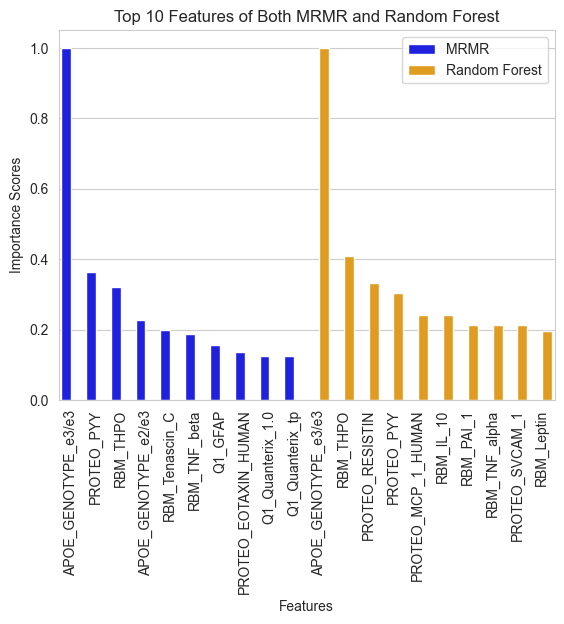

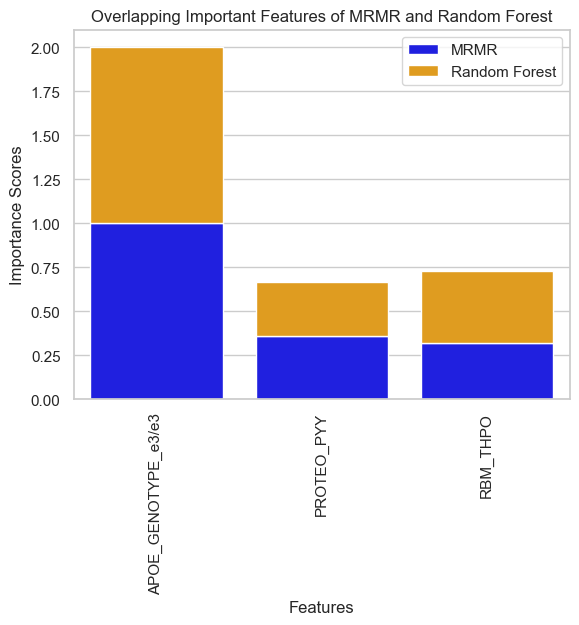

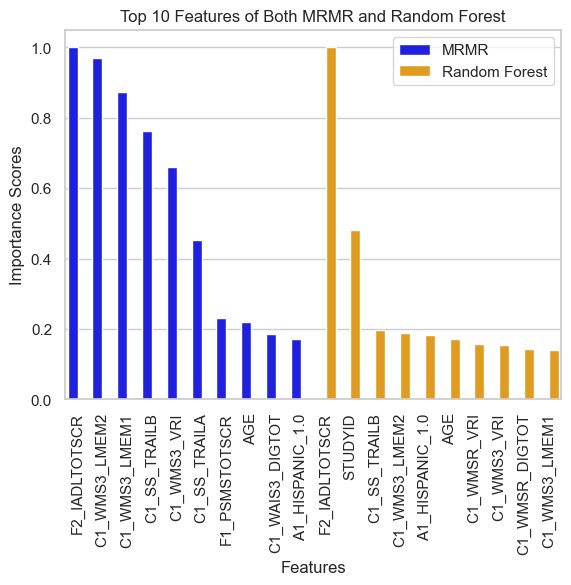

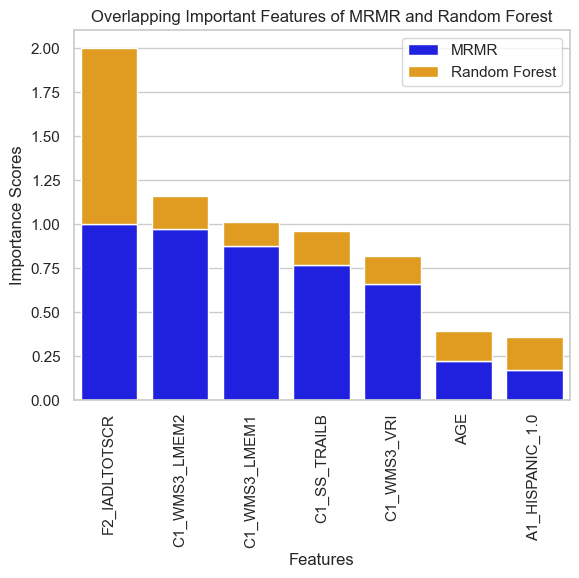

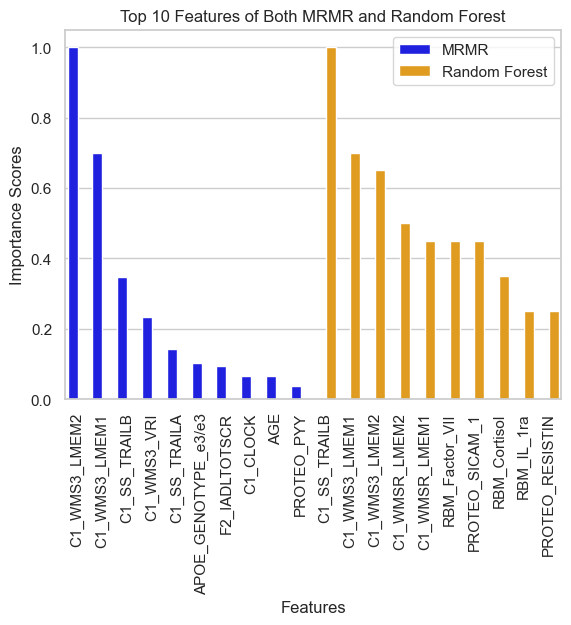

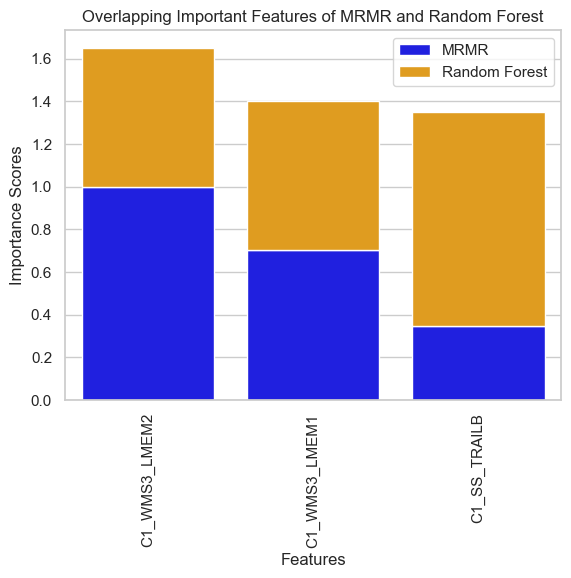

In [4]:
micro_f1_scores_b, feature_importances_b, confusion_matrices_b, r_b, features_b = run_random_forest(blood_only)
micro_f1_scores_c, feature_importances_c, confusion_matrices_c, r_c, features_c = run_random_forest(clinical_only)
micro_f1_scores_combined, feature_importances_combined, confusion_matrices_combined, r_combined, features_combined = run_random_forest(combined)

plot_mrmr_and_rf(blood_scores, r_b, features_b)
plot_mrmr_and_rf(clinical_scores, r_c, features_c)
plot_mrmr_and_rf(combined_scores, r_combined, features_combined)

Standard deviation of the top 10 features by permutation importance:
RBM_THPO: 0.011913820906519143
APOE_GENOTYPE_e3/e3: 0.017627039465044552
RBM_MMP_3: 0.004116789483669302
PROTEO_RESISTIN: 0.007701807890682135
PROTEO_PYY: 0.014938141877841328
RBM_TGF_alpha: 0.0058823529411765356
RBM_AgRP: 0.013018431415823234
PROTEO_INSULIN: 0.0037580974411761535
RBM_IgE: 0.0037580974411761535
RBM_I_309: 0.0
Top 10 features by permutation importance:
RBM_THPO: 0.03613445378151261
APOE_GENOTYPE_e3/e3: 0.025210084033613456
RBM_MMP_3: 0.01344537815126059
PROTEO_RESISTIN: 0.011764705882353
PROTEO_PYY: 0.010084033613445408
RBM_TGF_alpha: 0.00924369747899163
RBM_AgRP: 0.008403361344537818
PROTEO_INSULIN: 0.008403361344537808
RBM_IgE: 0.008403361344537808
RBM_I_309: 0.008403361344537785


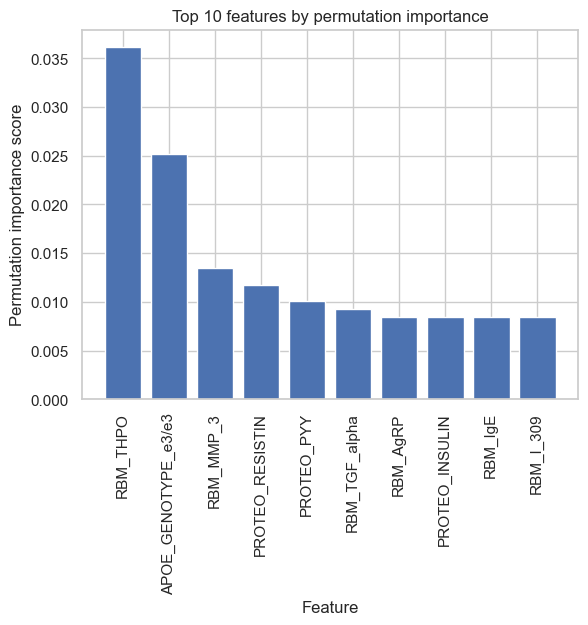

Standard deviation of the top 10 features by permutation importance:
F2_IADLTOTSCR: 0.0025111670667577937
STUDYID: 0.0024016166516639755
C1_WMS3_LMEM2: 0.004067677578548331
A1_HISPANIC_1.0: 0.0020818637859210706
AGE: 0.0022256060036710866
C1_SS_TRAILB: 0.0030082118312910093
C1_WMS3_LMEM1: 0.002285001122311002
C1_WMSR_LMEM1: 0.0011025911186108134
C1_WAIS3_DIGTOT: 0.0015338930828773694
C1_WMSR_VRI: 0.0010579509811425823
Top 10 features by permutation importance:
F2_IADLTOTSCR: 0.046307798481711494
STUDYID: 0.030848861283643857
C1_WMS3_LMEM2: 0.016632160110420957
A1_HISPANIC_1.0: 0.010351966873705976
AGE: 0.009661835748792248
C1_SS_TRAILB: 0.00724637681159418
C1_WMS3_LMEM1: 0.007073844030365761
C1_WMSR_LMEM1: 0.006314699792960654
C1_WAIS3_DIGTOT: 0.005590062111801219
C1_WMSR_VRI: 0.00517598343685296


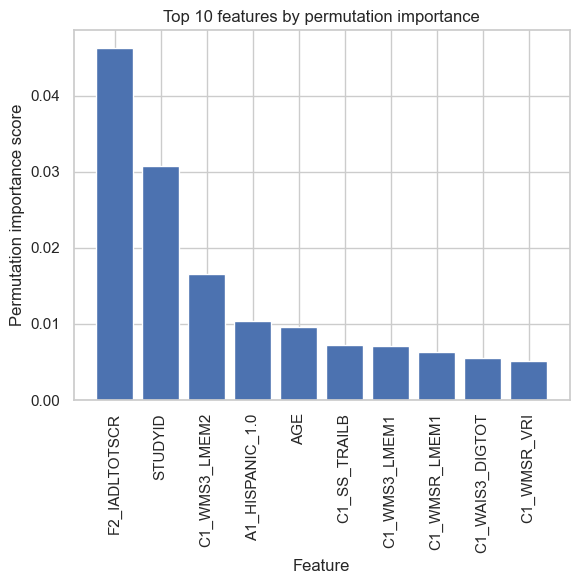

Standard deviation of the top 10 features by permutation importance:
C1_SS_TRAILB: 0.011884147582967183
C1_SS_TRAILA: 0.010084033613445348
C1_CLOCK: 0.010257609761120733
C1_WMS3_LMEM2: 0.013679681173193034
F2_IADLTOTSCR: 0.010761553340223228
RBM_TNF_beta: 0.008773366814210565
RBM_CRP: 0.006288499809704129
RBM_ICAM_1: 0.003850903945341079
A1_SEX_1.0: 0.003850903945341079
RBM_SOD: 0.003850903945341079
Top 10 features by permutation importance:
C1_SS_TRAILB: 0.025210084033613446
C1_SS_TRAILA: 0.02016806722689075
C1_CLOCK: 0.01764705882352944
C1_WMS3_LMEM2: 0.012605042016806756
F2_IADLTOTSCR: 0.011764705882352955
RBM_TNF_beta: 0.0075630252100840735
RBM_CRP: 0.006722689075630295
RBM_ICAM_1: 0.005882352941176528
A1_SEX_1.0: 0.005882352941176528
RBM_SOD: 0.005882352941176528


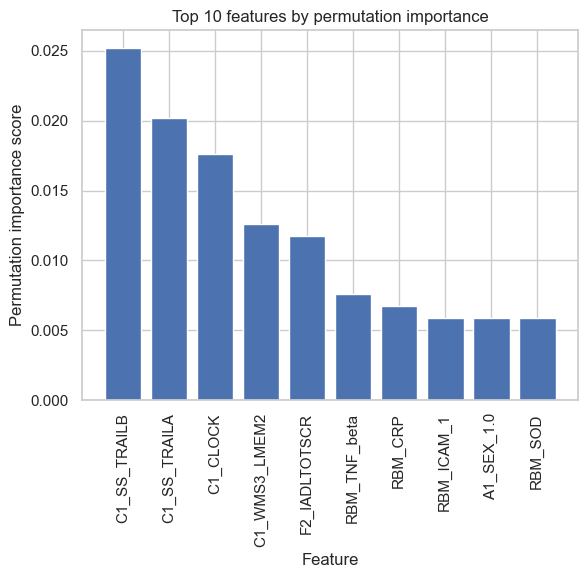

In [8]:
plot_rf_features(r_b, features_b)
plot_rf_features(r_c, features_c)
plot_rf_features(r_combined, features_combined)